In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Data Analytics\Data Analytics Projects\Portfolio projects\Python projects\Telco Cx Churn Analysis\Telco_RAW_DATA.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Replacing blanks with 0 as tenure is 0 and no total charges as recorded

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

In [9]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

In [10]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


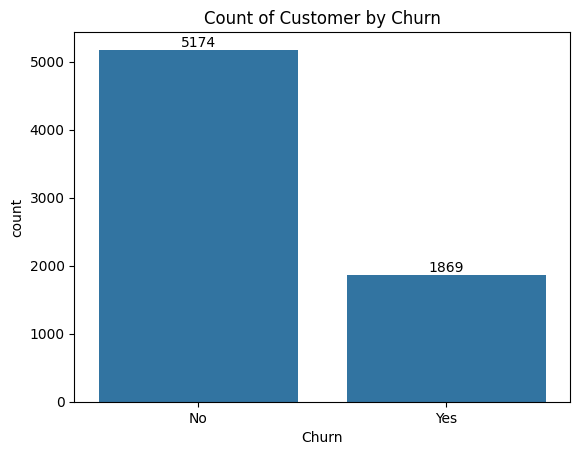

In [11]:
ax = sns.countplot(x = df["Churn"])
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

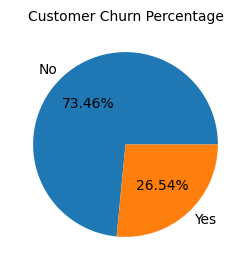

In [12]:
plt.figure(figsize = (3,3))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Customer Churn Percentage", fontsize = 10)
plt.show()

From the given pie chart we can conclude that 26.5% of our customers have churned out, now lets find out the reason behind it.

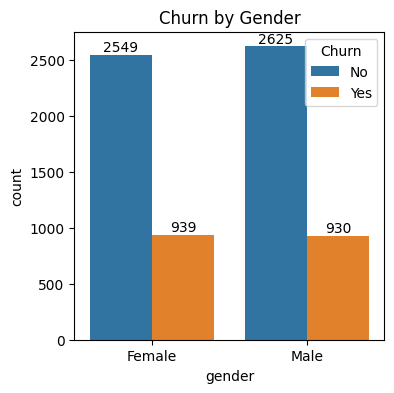

In [13]:
plt.figure(figsize = (4,4))
bx = sns.countplot(x = 'gender',data = df, hue = 'Churn')
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
plt.title("Churn by Gender")
plt.show()

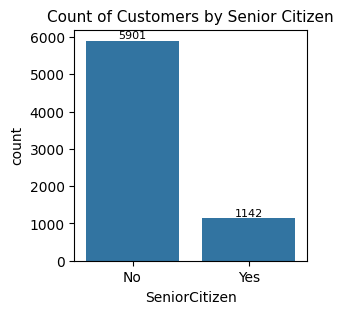

In [14]:
plt.figure(figsize = (3,3))
cx = sns.countplot(x = 'SeniorCitizen',data = df)
cx.bar_label(cx.containers[0], fontsize = 8)
plt.title("Count of Customers by Senior Citizen", fontsize = 11)
plt.show()

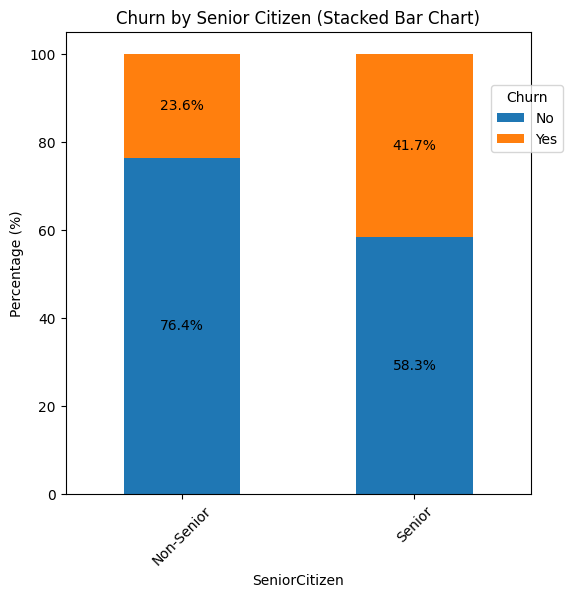

In [15]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack()*100
fig, ex = plt.subplots(figsize=(6,6))
total_counts.plot(kind='bar', stacked = True, ax=ex)

for p in ex.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ex.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha = 'center', va = 'center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = 45)
plt.xticks(ticks =[0,1], labels= ['Non-Senior', 'Senior'])
plt.legend(title = 'Churn', bbox_to_anchor = (0.9,0.9)) # Customize legend Location
plt.show()

Comparatively a greated percentage of people in senior citizen category have churned

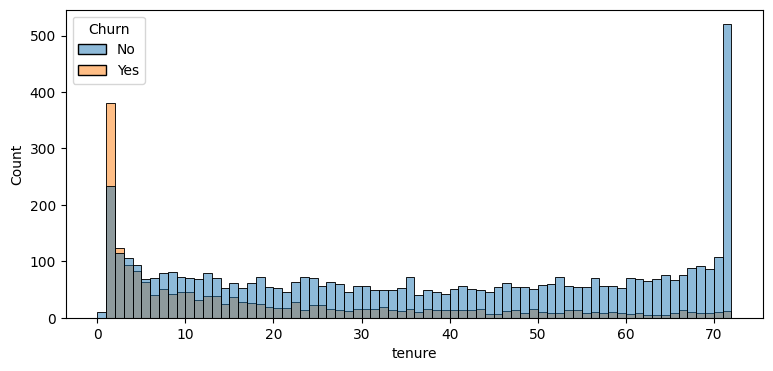

In [16]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

People who have used our services for a long time have stayed and people who have used for 1-2 months have churned out.

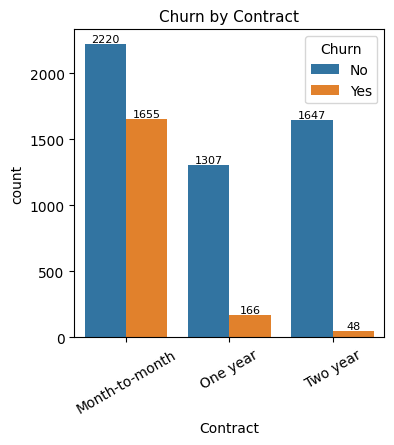

In [17]:
plt.figure(figsize = (4,4))
fx = sns.countplot(x = 'Contract',data = df, hue = "Churn")
fx.bar_label(fx.containers[0], fontsize = 8)
fx.bar_label(fx.containers[1], fontsize = 8)
plt.title("Churn by Contract", fontsize = 11)
plt.xticks(rotation = 30)
plt.show()

People who have month to month contract are more likely to churn than from those who have 1 or 2 years of contract

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

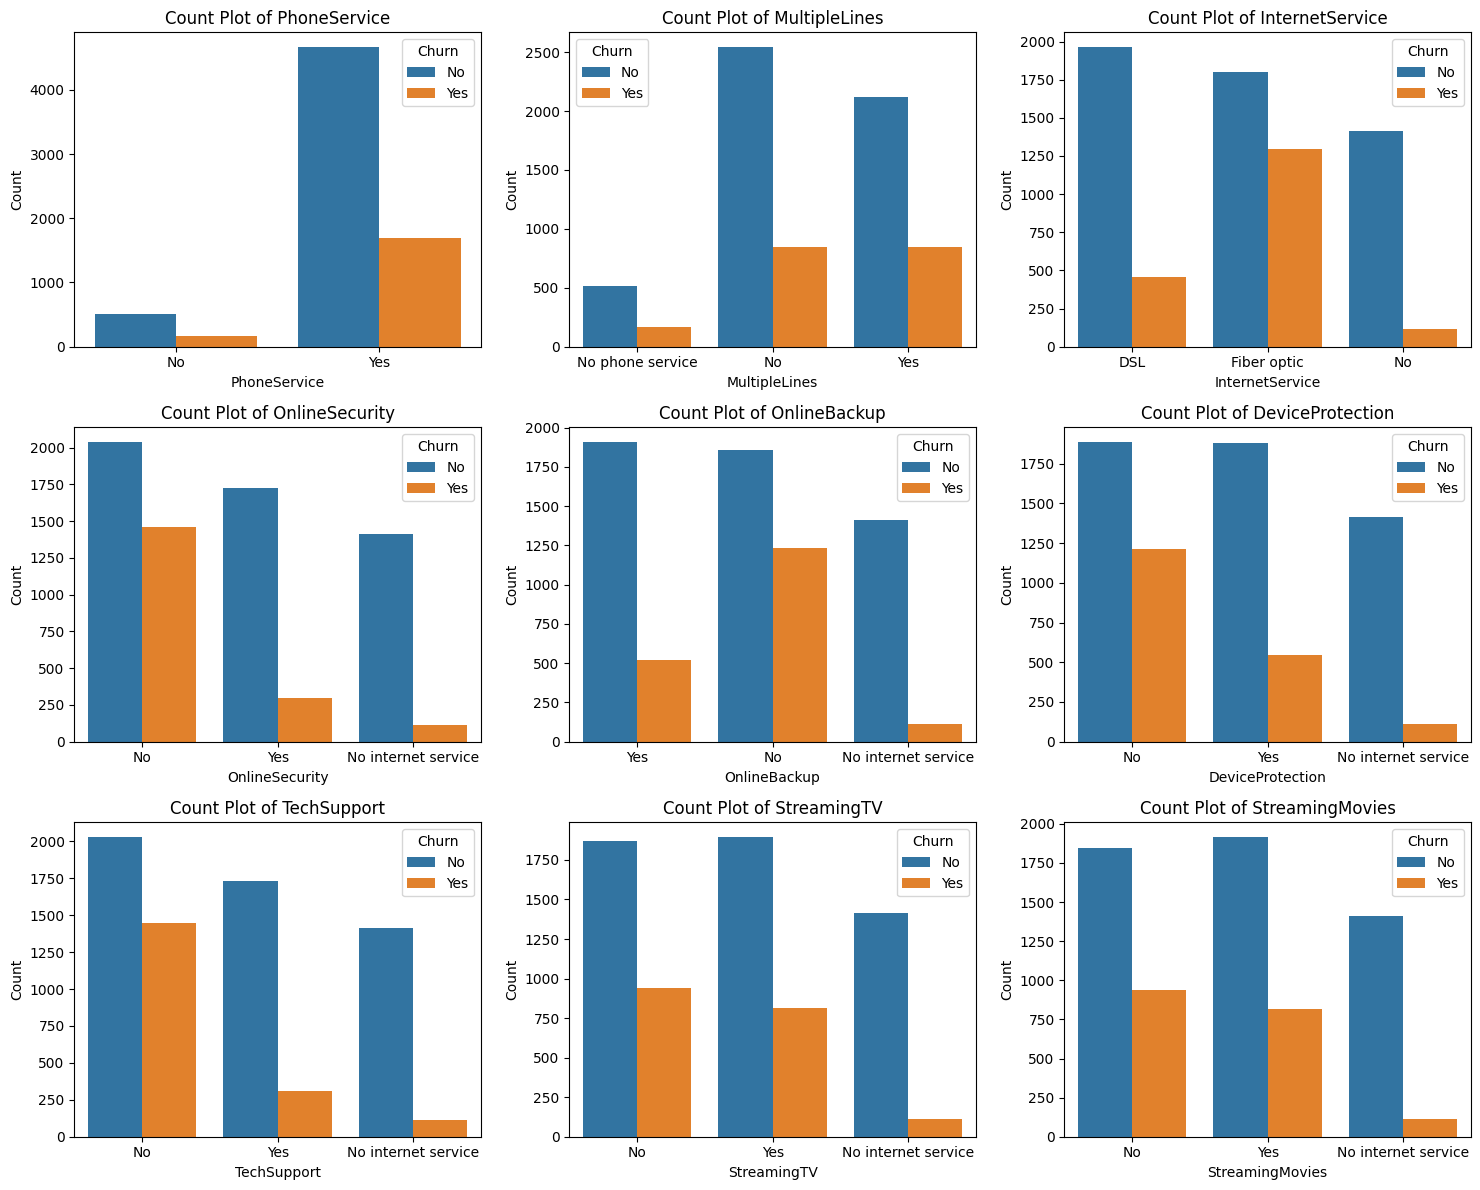

In [19]:
#List of columns for which we want to create count plots
columns =['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

#Number of columns for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols -1) // n_cols

#Create Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, n_rows * 4)) #Adjust figsize

#Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

#Iterate over columns and plotcount plots
for i, col in enumerate(columns):
    sns.countplot(x = col, data = df, ax=axes[i], hue = 'Churn')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#Remove empty subplots (if any)
for j in range(i +1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like Online Backup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

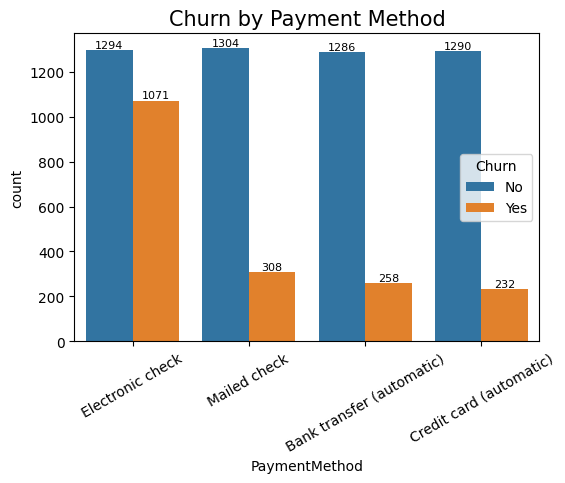

In [20]:
plt.figure(figsize = (6,4))
fx = sns.countplot(x = 'PaymentMethod',data = df, hue = "Churn")
fx.bar_label(fx.containers[0], fontsize = 8)
fx.bar_label(fx.containers[1], fontsize = 8)
plt.title("Churn by Payment Method", fontsize = 15)
plt.xticks(rotation = 30)
plt.show()

#Customers are likely to churn when they are using electronic check as a payment method.